# Test for ClassStatStar.py

Realizamos una comparación del código de StatStar programado en Fortran contra la versión reescrita en python usando clases

### Importamos librerías

In [33]:
from ClassStatStar import StellarStructure
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

Realizamos un cálculo para una estrella arbitraria

In [34]:
Msolar = 1
Lsolar = 0.86071
Te = 5500.20
X = 0.7
Z = 0.008
filename = "../data/star1_pyclass.dat"
star1 = StellarStructure(Msolar, Lsolar, Te, X, Z, filename)

CONGRATULATIONS, I THINK YOU FOUND IT! However, be sure to look at your model carefully.
***** The integration has been completed *****
            The model has been stored in starmodl.dat'


### Comparación Fortran VS Python Class StatStar

In [35]:
def find_header(file):
    with open(file,"r",encoding="utf-8") as file:
        rows = [row for row in file]
        for count, row in enumerate(rows):
            if (('r' in row)   and
                ('Qm' in row)  and 
                ('L_r' in row) and 
                ('T' in row)   and
                ('dlPdlT' in row)):
                count = count +1
                return count
            
columns = ['r', 'Qm', 'L_r', 'T', 'P', 'rho', 'kap', 'eps', 'zone', 'dlPdlT']

In [36]:
py_data = star1.exportToCSV()
py_data.head()

,r,Qm,L_r,T,P,rho,kap,eps,zone,dlPdlT
0,1.350000e+09,1.000,2.530000e+32,14000000.0,1.450000e+17,77.2,1.40,15.1,c,2.5
1,2.060000e+09,0.999,2.830000e+32,13900000.0,1.430000e+17,76.6,1.42,14.6,c,2.5
2,2.770000e+09,0.997,3.400000e+32,13800000.0,1.400000e+17,75.7,1.44,13.9,c,2.5
3,3.480000e+09,0.993,4.280000e+32,13700000.0,1.360000e+17,74.5,1.46,13.1,c,2.5
4,4.190000e+09,0.988,5.510000e+32,13500000.0,1.320000e+17,73.1,1.49,12.1,c,2.5


In [37]:
fortran_file = "../data/star1_fortran.dat"
fortran_data = pd.read_csv(fortran_file, skiprows=find_header(fortran_file), sep='\s+', names=columns)
fortran_data.head()


,r,Qm,L_r,T,P,rho,kap,eps,zone,dlPdlT
0,1.350000e+09,1.000,2.530000e+32,14000000.0,1.450000e+17,77.2,1.40,1.51E+01,c,2.5
1,2.060000e+09,0.999,2.830000e+32,13900000.0,1.430000e+17,76.6,1.42,1.46E+01,c,2.5
2,2.770000e+09,0.997,3.400000e+32,13800000.0,1.400000e+17,75.7,1.44,1.39E+01,c,2.5
3,3.480000e+09,0.993,4.280000e+32,13700000.0,1.360000e+17,74.5,1.46,1.31E+01,c,2.5
4,4.190000e+09,0.988,5.510000e+32,13500000.0,1.320000e+17,73.1,1.49,1.21E+01,c,2.5


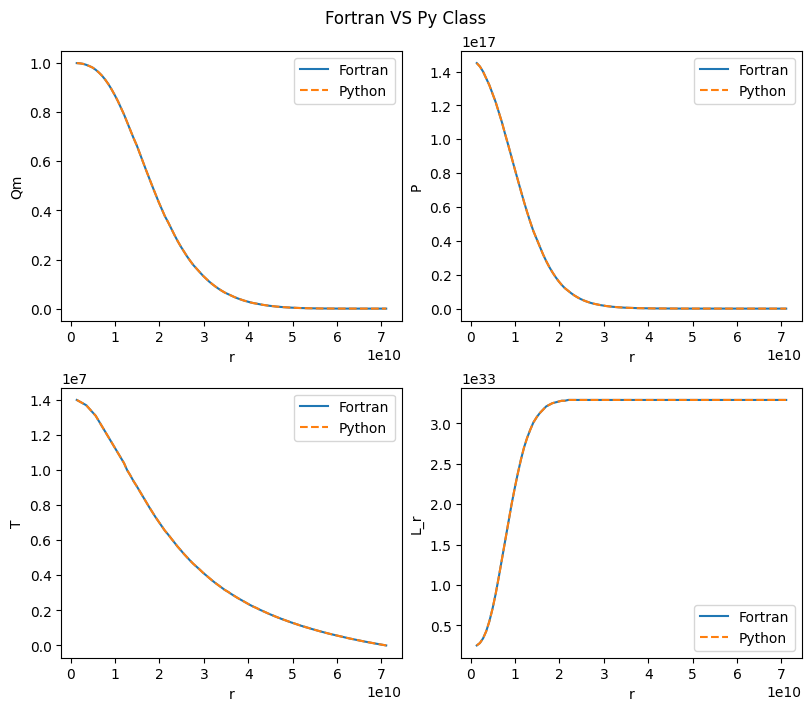

In [38]:
%matplotlib inline

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8, 7), constrained_layout=True)
fig.suptitle("Fortran VS Py Class")

sns.lineplot(data=fortran_data, x='r', y='Qm', ax=ax[0][0], label='Fortran')
sns.lineplot(data=fortran_data, x='r', y='P', ax=ax[0][1], label='Fortran')
sns.lineplot(data=fortran_data, x='r', y='T', ax=ax[1][0], label='Fortran')
sns.lineplot(data=fortran_data, x='r', y='L_r', ax=ax[1][1], label='Fortran')

sns.lineplot(data=py_data, x='r', y='Qm', ax=ax[0][0], label='Python', linestyle='dashed')
sns.lineplot(data=py_data, x='r', y='P', ax=ax[0][1], label='Python', linestyle='dashed')
sns.lineplot(data=py_data, x='r', y='T', ax=ax[1][0], label='Python', linestyle='dashed')
sns.lineplot(data=py_data, x='r', y='L_r', ax=ax[1][1], label='Python', linestyle='dashed')

plt.legend()
plt.show()

### Sun structure comparative

In [39]:
Msolar = 1
Lsolar = 0.86071
Te = 5500.20
X = 0.7
Z = 0.008
filename = "../data/sun_pyclass.dat"
sun = StellarStructure(Msolar, Lsolar, Te, X, Z, filename)

CONGRATULATIONS, I THINK YOU FOUND IT! However, be sure to look at your model carefully.
***** The integration has been completed *****
            The model has been stored in starmodl.dat'


In [40]:
py_data = sun.exportToCSV()
fortran_file = "../data/sun_fortran.dat"
fortran_data = pd.read_csv(fortran_file, skiprows=find_header(fortran_file), sep='\s+', names=columns)

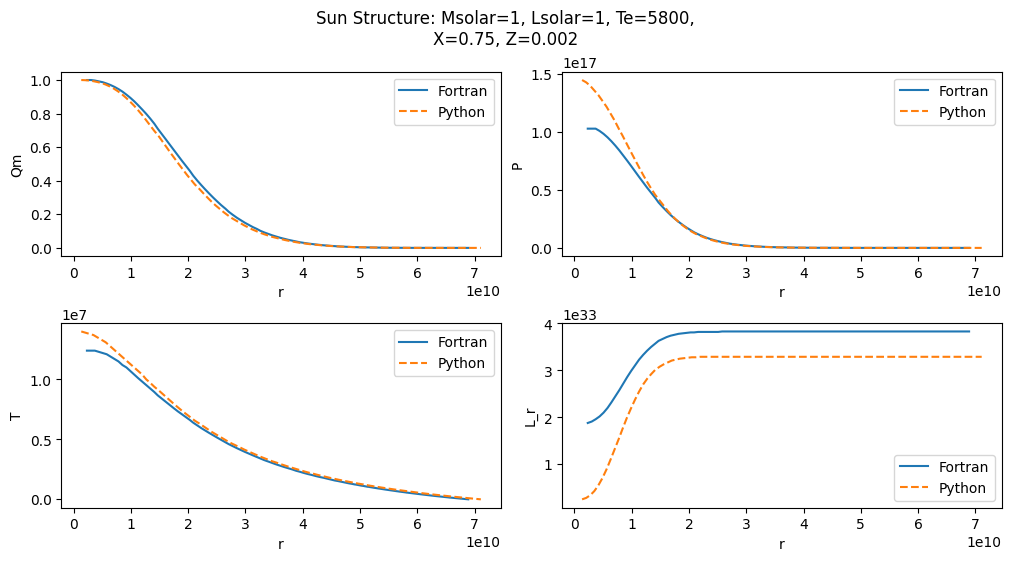

In [41]:
%matplotlib inline

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 5.5), constrained_layout=True)
fig.suptitle("Sun Structure: Msolar=1, Lsolar=1, Te=5800,\nX=0.75, Z=0.002")

sns.lineplot(data=fortran_data, x='r', y='Qm', ax=ax[0][0], label='Fortran')
sns.lineplot(data=fortran_data, x='r', y='P', ax=ax[0][1], label='Fortran')
sns.lineplot(data=fortran_data, x='r', y='T', ax=ax[1][0], label='Fortran')
sns.lineplot(data=fortran_data, x='r', y='L_r', ax=ax[1][1], label='Fortran')

sns.lineplot(data=py_data, x='r', y='Qm', ax=ax[0][0], label='Python', linestyle='dashed')
sns.lineplot(data=py_data, x='r', y='P', ax=ax[0][1], label='Python', linestyle='dashed')
sns.lineplot(data=py_data, x='r', y='T', ax=ax[1][0], label='Python', linestyle='dashed')
sns.lineplot(data=py_data, x='r', y='L_r', ax=ax[1][1], label='Python', linestyle='dashed')

plt.legend()
plt.show()

### Radial Graphs

In [42]:
# Data
sun = StellarStructure(Msolar, Lsolar, Te, X, Z, filename)
sun.exportToCSV()

CONGRATULATIONS, I THINK YOU FOUND IT! However, be sure to look at your model carefully.
***** The integration has been completed *****
            The model has been stored in starmodl.dat'


,r,Qm,L_r,T,P,rho,kap,eps,zone,dlPdlT
0,1.350000e+09,1.000000e+00,2.530000e+32,14000000.0,1.450000e+17,7.720000e+01,1.40,1.510000e+01,c,2.5
1,2.060000e+09,9.990000e-01,2.830000e+32,13900000.0,1.430000e+17,7.660000e+01,1.42,1.460000e+01,c,2.5
2,2.770000e+09,9.970000e-01,3.400000e+32,13800000.0,1.400000e+17,7.570000e+01,1.44,1.390000e+01,c,2.5
3,3.480000e+09,9.930000e-01,4.280000e+32,13700000.0,1.360000e+17,7.450000e+01,1.46,1.310000e+01,c,2.5
4,4.190000e+09,9.880000e-01,5.510000e+32,13500000.0,1.320000e+17,7.310000e+01,1.49,1.210000e+01,c,2.5
...,...,...,...,...,...,...,...,...,...,...
419,7.080000e+10,1.180000e-11,3.290000e+33,13200.0,6.640000e+03,3.720000e-09,130.00,5.650000e-64,r,4.8
420,7.080000e+10,3.400000e-12,3.290000e+33,9880.0,1.660000e+03,1.240000e-09,148.00,1.200000e-70,r,4.9
421,7.090000e+10,6.080000e-13,3.290000e+33,6580.0,2.260000e+02,2.520000e-10,172.00,3.790000e-81,r,4.8
422,7.100000e+10,3.940000e-14,3.290000e+33,3290.0,7.970000e+00,1.750000e-11,230.00,1.670000e-102,r,4.2


C:\Users\loera\AppData\Local\Temp\ipykernel_11596\666713327.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(tt, rr, colors, cmap='seismic')


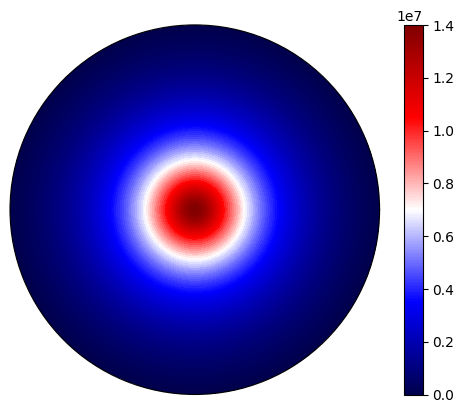

In [43]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# eliminate angles and radius tick labels
ax.set_rticks([])
ax.set_xticklabels([])

# Set a polar grid & match radius with temperature
rr, tt = np.meshgrid(sun.df['r'], np.linspace(0, 2*np.pi, 500))
colors = 500*[sun.df['T']]

# Colormesh and colorbar
im = ax.pcolormesh(tt, rr, colors, cmap='seismic')
plt.colorbar(im);
